#### Dataset

In [51]:
import numpy as np
np.random.seed(42)

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [53]:
dataset = load_breast_cancer()

print(f"ClassNames: {dataset.target_names}")
print(f"DESCR:\n{dataset.DESCR}")

ClassNames: ['malignant' 'benign']
DESCR:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 fea

In [54]:
x = dataset.data
y = dataset.target

print(f"x-shape: {x.shape}")

x-shape: (569, 30)


#### PCA

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [56]:
scaler = StandardScaler()
scaler.fit(x)

# StandardScaler.fit(x)
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
print(f"x mean:\n{x_mean}")
print(f"x std:\n{x_std}")

x_standardized = scaler.transform(x)
print(x_standardized[0])

# StandardScaler.transform(x)
x_ = (x - x_mean) / x_std
print(x_[0])

x mean:
[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]
x std:
[3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02 5.27663291e-02 7.96497253e-02 3.87687325e-02
 2.73901809e-02 7.05415588e-03 2.77068942e-01 5.51163427e-01
 2.02007710e+00 4.54510134e+01 2.99987837e-03 1.78924359e-02
 3.01595231e-02 6.16486075e-03 8.25910439e-03 2.64374475e-03
 4.82899258e+00 6.14085432e+00 3.35730016e+01 5.68856459e+02
 2.28123569e-02 1.57198171e-01 2.08440875e-01 6.56745545e-02
 6.18130785e-02 1.80453893e-02]
[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.283

In [57]:
n_components = 15
pca = PCA(n_components=n_components, copy=True)
pca.fit(x_standardized)
x_pca = pca.transform(x_standardized)

In [58]:
print(f"Components:\n{pca.components_}")
print(f"Explained Variance:\n{pca.explained_variance_}")
print(f"Explained Variance Ratio:\n{pca.explained_variance_ratio_}")
print(f"Sum of Exmplained Variance Ratio:\n{sum(pca.explained_variance_ratio_)}")

Components:
[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.99878428e-01 -2.19351858e-01
   1.72304352e-01  1.43593173e-01  9.79641143e-02 -8.25723507e-03
   1.41883349e-01  2.75339469

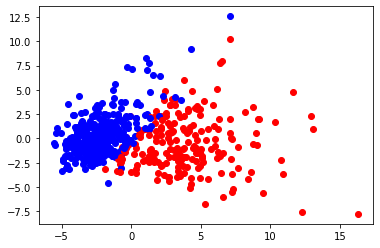

In [59]:
colors = ["red", "blue"]
for index, point in enumerate(x_pca):
    plt.scatter(point[0], point[1], color=colors[y[index]])
plt.show()

### Coding Exercise

In [60]:
# Aufgabe 1:
# Finde die Anzahl an Dimensionen, um 90% der Varianz "zu erklären"

for n_components in range(1, 29):
    pca = PCA(n_components=n_components, copy=True)
    pca.fit(x_standardized)
    explained_variance_ratio = sum(pca.explained_variance_ratio_)
    
    print(f"Sum of Explained Variance Ratio: {round(explained_variance_ratio, 4)} with: {n_components} components.")

    if explained_variance_ratio > 0.90:
        break
    else:  
        best_explained_variance_ratio = explained_variance_ratio

print(f"Number of components for at least 90% Variance:  {n_components}")

Sum of Explained Variance Ratio: 0.4427 with: 1 components.
Sum of Explained Variance Ratio: 0.6324 with: 2 components.
Sum of Explained Variance Ratio: 0.7264 with: 3 components.
Sum of Explained Variance Ratio: 0.7924 with: 4 components.
Sum of Explained Variance Ratio: 0.8473 with: 5 components.
Sum of Explained Variance Ratio: 0.8876 with: 6 components.
Sum of Explained Variance Ratio: 0.9101 with: 7 components.
Number of components for at least 90% Variance:  7


In [61]:
# Aufgabe 1 (via PCA):
pca = PCA(n_components=0.90)
pca.fit(x_standardized)
explained_variance_ratio = sum(pca.explained_variance_ratio_)
print(f"Sum of Explained Variance Ratio: {round(explained_variance_ratio, 4)} with: {pca.n_components_} components.")


Sum of Explained Variance Ratio: 0.9101 with: 7 components.


In [62]:
# Aufgabe 2:
# Wende das gefundene Setup auf die Daten an

n_components = 7
pca = PCA(n_components=n_components, copy=True)
pca.fit(x_standardized)
x_pca = pca.transform(x_standardized)

In [63]:
# Aufgabe 3:
# Split das Dataset in ein Train and Testset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.30)

In [68]:
# Aufgabe 4:
# Wende das KNN-Verfahren an
from sklearn.neighbors import KNeighborsClassifier

best_score = 0.0
best_neighbors = 0
for i in range(1, 11):
    n_neighbors = i
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    neigh.fit(x_train, y_train)
    score = neigh.score(x_test, y_test)
    print("Score: ", score, " with: ", n_neighbors, " neighbors.")
    
    if score > best_score:
        best_score = score
        best_neighbors = n_neighbors

print("Best Score: ", best_score, " with: ", best_neighbors, " neighbors.")    

Score:  0.9707602339181286  with:  1  neighbors.
Score:  0.9649122807017544  with:  2  neighbors.
Score:  0.9766081871345029  with:  3  neighbors.
Score:  0.9766081871345029  with:  4  neighbors.
Score:  0.9766081871345029  with:  5  neighbors.
Score:  0.9766081871345029  with:  6  neighbors.
Score:  0.9766081871345029  with:  7  neighbors.
Score:  0.9707602339181286  with:  8  neighbors.
Score:  0.9766081871345029  with:  9  neighbors.
Score:  0.9766081871345029  with:  10  neighbors.
Best Score:  0.9766081871345029  with:  3  neighbors.


In [70]:
# Aufgabe 5:
# Wende das KNN ohne Normalisierung und PCA an
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=0.30)

best_score = 0.0
best_neighbors = 0
for i in range(1, 11):
    n_neighbors = i
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    neigh.fit(x_train, y_train)
    score = neigh.score(x_test, y_test)
    print("Score: ", score, " with: ", n_neighbors, " neighbors.")

    if score > best_score:
        best_score = score
        best_neighbors = n_neighbors

print("Best Score: ", best_score, " with: ", best_neighbors, " neighbors.")            

Score:  0.9707602339181286  with:  1  neighbors.
Score:  0.9649122807017544  with:  2  neighbors.
Score:  0.9766081871345029  with:  3  neighbors.
Score:  0.9766081871345029  with:  4  neighbors.
Score:  0.9766081871345029  with:  5  neighbors.
Score:  0.9824561403508771  with:  6  neighbors.
Score:  0.9766081871345029  with:  7  neighbors.
Score:  0.9824561403508771  with:  8  neighbors.
Score:  0.9707602339181286  with:  9  neighbors.
Score:  0.9766081871345029  with:  10  neighbors.
Best Score:  0.9824561403508771  with:  6  neighbors.
